In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.graphics import regressionplots
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv("50_Startups.csv") # reading the csv file

In [5]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [8]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [9]:
df.rename(columns={'R&D Spend': 'spendRD',
                           'Administration':'Administration',
                           'Marketing Spend':'spendMarketing'},inplace=True)
# rename  the feature names for easy performing

In [10]:
print(df.columns)

Index(['spendRD', 'Administration', 'spendMarketing', 'State', 'Profit'], dtype='object')


In [11]:
df.head()

,spendRD,Administration,spendMarketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


SCATTER PLOTS FOR THE FEATURES OF DATASET TO CHECK CORRELATION

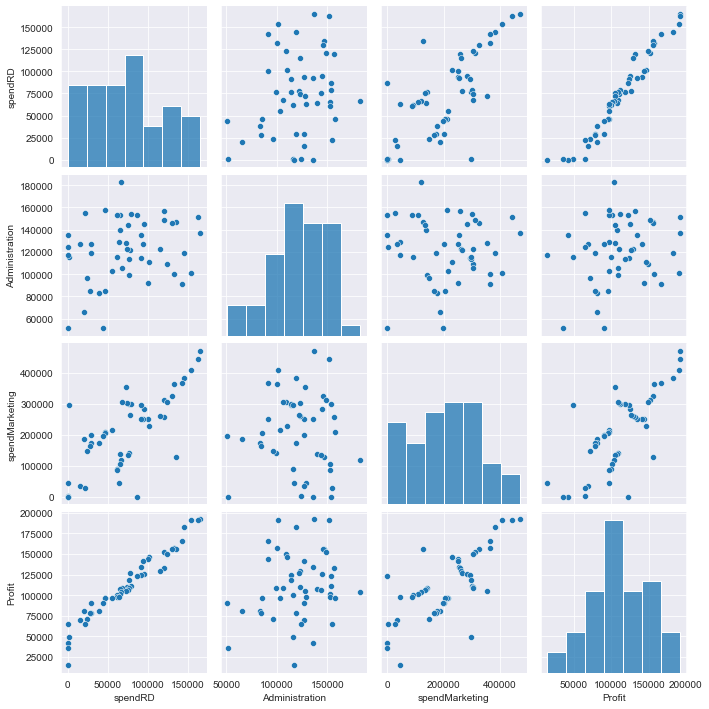

In [12]:
sns.set_style("darkgrid")
sns.pairplot(df)

PREPARING THE MODEL ::
BUILD MODEL

In [13]:
import statsmodels.formula.api as smf 

In [14]:
model=smf.ols('Profit~spendRD+Administration+spendMarketing',data=df).fit()
print(model.pvalues)

Intercept         1.057379e-09
spendRD           2.634968e-22
Administration    6.017551e-01
spendMarketing    1.047168e-01
dtype: float64


In [15]:
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

BUILD SIMPLE REGRESSION MODELS TO FIND  CORRELATION::(THE POINTS WHICH AFFECTS THE PROFIT)

In [16]:
m_1=smf.ols('Profit~Administration',data=df).fit()
print(m_1.tvalues,'\n',m_1.pvalues)

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


In [17]:
m_2=smf.ols('Profit~spendMarketing',data=df).fit()
print(m_2.tvalues,'\n',m_2.pvalues)

Intercept         7.808356
spendMarketing    7.802657
dtype: float64 
 Intercept         4.294735e-10
spendMarketing    4.381073e-10
dtype: float64


In [18]:
m_3=smf.ols('Profit~spendRD',data=df).fit()
print(m_3.tvalues,'\n',m_3.pvalues)

Intercept    19.320288
spendRD      29.151139
dtype: float64 
 Intercept    2.782697e-24
spendRD      3.500322e-32
dtype: float64


In [19]:
m_AM=smf.ols('Profit~Administration+spendMarketing',data=df).fit()
print(m_AM.tvalues,'\n',m_AM.pvalues)

Intercept         1.142741
Administration    2.467779
spendMarketing    8.281039
dtype: float64 
 Intercept         2.589341e-01
Administration    1.729198e-02
spendMarketing    9.727245e-11
dtype: float64


In [20]:
m_rdmar=smf.ols('Profit~spendRD+spendMarketing',data=df).fit()  
print(m_rdmar.tvalues,'\n',m_rdmar.pvalues)

Intercept         17.463582
spendRD           19.265555
spendMarketing     1.927052
dtype: float64 
 Intercept         3.504062e-22
spendRD           6.040433e-24
spendMarketing    6.003040e-02
dtype: float64


CALCULATING VIF

In [21]:
rsq_spendRD=smf.ols('spendRD~Administration+spendMarketing',data=df).fit().rsquared
vif_spendRD=1/(1-rsq_spendRD)
rsq_Admin=smf.ols('Administration~spendMarketing+spendRD',data=df).fit().rsquared
vif_Admin=1/(1-rsq_Admin)
rsq_spendmarket=smf.ols('spendMarketing~spendRD+Administration',data=df).fit().rsquared
vif_spendmarket=1/(1-rsq_spendmarket)
d1={'varibles':['spendRD','Admini','spendmarket'],'VIF':[vif_spendRD,vif_Admin,vif_spendmarket]}
vif_frame=pd.DataFrame(d1)
vif_frame

,varibles,VIF
0,spendRD,2.468903
1,Admini,1.175091
2,spendmarket,2.326773


CHECK FOR NORMALITY BY QQPLOTS

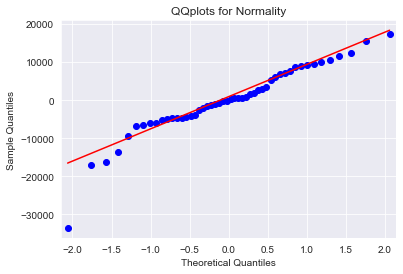

In [22]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("QQplots for Normality")
plt.show()

TO CHECK FOR HOMOSCEDASTICITY

In [23]:
def get_standard_values(values):
    return (values-values.mean())/(values.std())

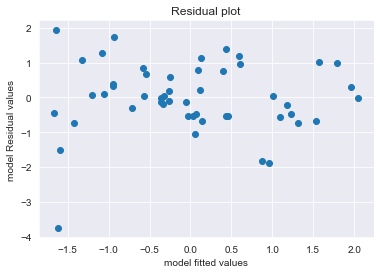

In [24]:
plt.scatter(get_standard_values(model.fittedvalues),get_standard_values(model.resid))
plt.title("Residual plot")
plt.xlabel("model fitted values")
plt.ylabel("model Residual values")
plt.show()

MODEL DELETION
COOK'S DISTANCE


In [25]:
#cooksdistance #1
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

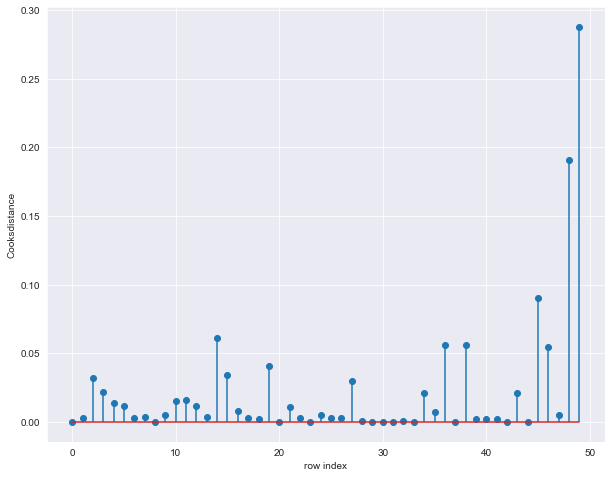

In [28]:
fig=plt.subplots(figsize=(10,8))
plt.stem(np.arange(len(df)),np.round(c,3))
plt.xlabel("row index")
plt.ylabel("Cooksdistance")
plt.show()

In [29]:
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

TO CHECK HIGH INFLUENCE PLOTS ALSO

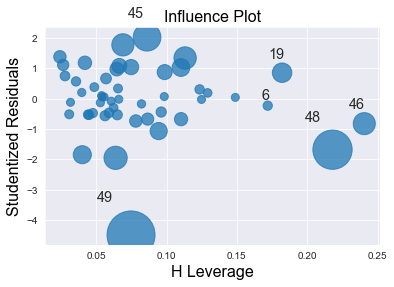

In [30]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [27]:
df[df.index.isin([48,49])]

,spendRD,Administration,spendMarketing,State,Profit
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [28]:
df1=df.copy()

In [29]:
df2=df1.drop(df1.index[[48,49]],axis=0).reset_index()
df2=(df2.drop(['index'],axis=1))
df2.head()

,spendRD,Administration,spendMarketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


BUILD A MODEL

In [43]:
#exclude the feature RDspend and check rsquared and aic values
final_rdspend=smf.ols('Profit~Administration+spendMarketing',data=df2).fit()
(final_rdspend.rsquared,final_rdspend.aic)

(0.5625802937857887, 1110.8101546830774)

In [31]:
#exculde the feature Marketingspend and check rsquared and aic values
final_spendmar=smf.ols('Profit~Administration+spendRD',data=df2).fit()
(final_spendmar.rsquared,final_spendmar.aic)

(0.9613542664192156, 994.3402293693792)

THE VALUE OF MARKTINGSPEND HAS HIGH RSQUARED AND LESS AIC WE SELECT THIS MODEL ("final_spendmar")

In [32]:
# again check for the max of cooks distance and rebulid the model of confirmation
model_f_influence=final_spendmar.get_influence()
(c_mar,_)=model_f_influence.cooks_distance

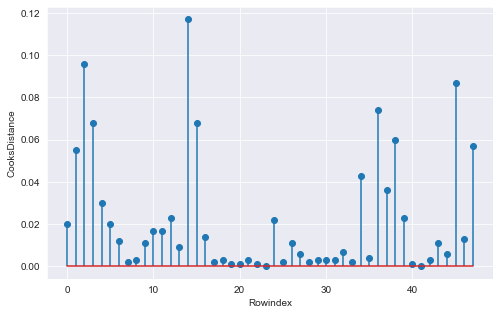

In [47]:
fig=plt.subplots(figsize=(8,5))
plt.stem(np.arange(len(df2)),np.round(c_mar,3))
plt.xlabel("Rowindex")
plt.ylabel("CooksDistance")
plt.show()

In [33]:
(np.argmax(c_mar),np.max(c_mar))

(14, 0.1165446497672248)

SINCE THE VALUE IS <<1 WE CAN STOP THE DIAGONSTIC PROCESS AND FINALISE THE MODEL

In [34]:
# CHECK THE ACCURACY MODE OF THE MODEL
final_marketingspend=smf.ols('Profit~spendRD+Administration',data=df2).fit()
(final_marketingspend.rsquared,final_marketingspend.aic)

(0.9613542664192156, 994.3402293693792)